<a href="https://colab.research.google.com/github/YukiAoki-GU/IoT_for_beginners/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習入門

## パーセプトロンとは
動物の脳は，神経細胞(ニューロン)の巨大なネットワークです。
ニューロン同士の電気信号のやりとりはシナプス結合を介して行われます。

こうしたネットワークの構造のごくシンプルな部分だけを人工的に模したものを人工ニューロン(単純パーセプトロン)と呼ばれます。

まずはニューラルネットワークの元になるパーセプトロンの原理を理解しましょう。

ポイントは，正解とのずれである損失を小さくなるような重み係数を探すバックプロパゲーションの工程です。

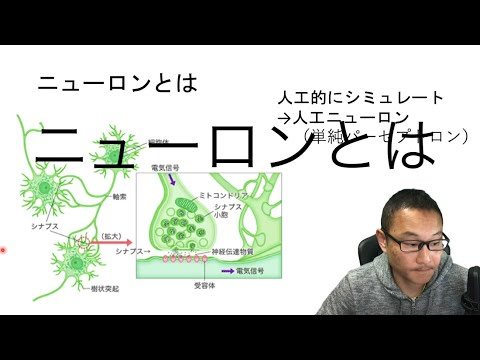

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('6o8ZKVEg5Rk', width=400, height=225)

## パーセプトロンを作ろう
パーセプトロンを作ってみましょう。
バックプロパゲーションのオプティマイザーが用意されているライブラリを使わずに，単純なものを自分で作ってみましょう。

最も単純なものとして，入力は$x_1$と$x_2$の2種類のみで，それぞれに0 or 1が入力されることを考えます。
$x_1=x_2=1$の時のみ発火する，つまりANDゲートを機械学習で判定してみましょう。
まずはどのようなコーディングが必要になるかを考えましょう。

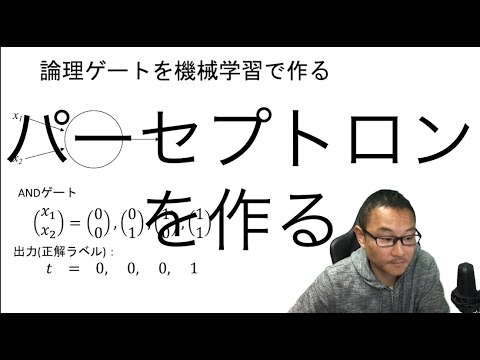

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('pR4Wus9uXzc', width=400, height=225)

## 単純パーセプトロンのコーディング(ANDゲート)
単純パーセプトロンのコーディングをしてみましょう。

In [5]:
import numpy as np                # NumPyをインポート

def create_matrix(x):             #データx1、x2にバイアスに対応するx0(=1)を加えた行列を作成
    x0 = np.ones([x.shape[0], 1])

    return np.hstack([x0, x])


def sigmoid(X, w):                # シグモイド関数
    return 1 / (1 + np.exp(-np.dot(X, w)))

def logistic_regression(X, t):    # 単純パーセプトロン
    LR = 1e-1                     # 学習率を0.1に設定
    loop = 50                     # 学習回数
    count = 1                     # 学習回数をカウントする変数
    w = np.random.rand(3) # バイアス,w1,w2を0〜1の一様乱数で初期化

    for i in range(loop):         # 学習をloop回繰り返す

        w = w - LR*np.dot(sigmoid(X,w) - t, X)
        # 最初の1回と以降10回ごとにパラメーターの値を出力
        if (count == 1 or count % 10 == 0):
            print('{}回: w = {}'.format(count, w))
        count += 1               # カウンター変数の値を1増やす

    return w             # 学習後のバイアス、w1、w2を返す


In [6]:
# ANDゲート
# x1、x2の4セット
x =np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# 正解ラベル
t = np.array([0, 0, 0, 1])
# Xを作る
X = create_matrix(x)
# バイアス、重みの値を学習する
w = logistic_regression(X, t)

1回: w = [0.40646721 0.81858461 0.36488809]
10回: w = [-0.71242096  0.57124949  0.20534686]
20回: w = [-1.21539799  0.67975892  0.39060764]
30回: w = [-1.53770993  0.8558688   0.62400894]
40回: w = [-1.80500537  1.03007688  0.84279   ]
50回: w = [-2.04457035  1.19176745  1.03963896]


シグモイド関数を以下でプロットしてみよう。

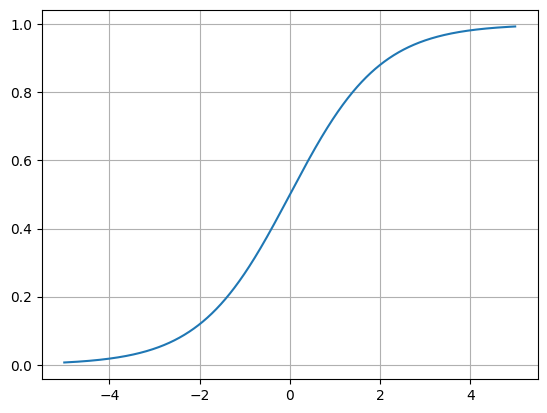

In [7]:
# グラフのインライン表示
%matplotlib inline
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):                   # シグモイド関数
    return 1 / (1 + np.exp(-x))

# -5.0から5.0までを0.01刻み
x = np.arange(-5.0, 5.0, 0.01)
y = sigmoid(x)
plt.plot(x, y)
plt.grid(True) # グリッド
plt.show()

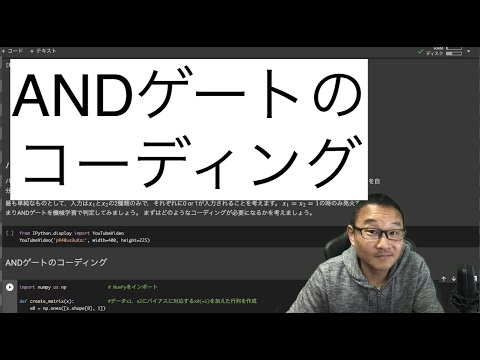

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('opiGWb2w8C4', width=400, height=225)

## 多層パーセプトロンのコーディング(XORゲート)
ANDゲートと同様に，NANDゲート，ORゲートも単純パーセプトロンで分類することができます。
しかしXORゲートを作るにはパーセプトロンを複数繋げる必要があります。
これが深層学習です。

In [9]:
import numpy as np  # NumPyをインポート

def create_matrix(x):  # データx1、x2にバイアスに対応するx0(=1)を加えた行列を作成
    x0 = np.ones([x.shape[0], 1])
    return np.hstack([x0, x])

def sigmoid(X, w):  # シグモイド関数
    return 1 / (1 + np.exp(-np.dot(X, w)))

def logistic_regression(X, t):  # 単純パーセプトロン
    LR = 1e-1  # 学習率を0.1に設定
    loop = 50  # 学習回数
    count = 1  # 学習回数をカウントする変数
    w = np.random.rand(X.shape[1])  # バイアス,w1,w2を0〜1の一様乱数で初期化

    for i in range(loop):  # 学習をloop回繰り返す
        w = w - LR * np.dot((sigmoid(X, w) - t), X)
        # 最初の1回と以降10回ごとにパラメーターの値を出力
        if count == 1 or count % 10 == 0:
            print(f'{count}回: w = {w}')
        count += 1  # カウンター変数の値を1増やす

    return w  # 学習後のバイアス、w1、w2を返す

# NANDゲート
# x1 | x2 | t
#--------------
# 0  | 0  | 1
# 0  | 1  | 1
# 1  | 0  | 1
# 1  | 1  | 0

# x1、x2の4セット
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# 正解ラベル
t = np.array([1, 1, 1, 0])

# Xを作る
X = create_matrix(x)

# バイアス、重みの値を学習する
w = logistic_regression(X, t)
print(f"学習後のパラメータ: {w}")

1回: w = [0.11086551 0.58556772 0.62772823]
10回: w = [0.43120395 0.21397248 0.24839159]
20回: w = [ 0.78862449 -0.12034677 -0.09290786]
30回: w = [ 1.1186928  -0.40021983 -0.37828824]
40回: w = [ 1.41771054 -0.64100405 -0.62340264]
50回: w = [ 1.6889595  -0.85213561 -0.8379428 ]
学習後のパラメータ: [ 1.6889595  -0.85213561 -0.8379428 ]


In [10]:
# ORゲート
# x1 | x2 | t
#--------------
# 0  | 0  | 0
# 0  | 1  | 1
# 1  | 0  | 1
# 1  | 1  | 1

# x1、x2の4セット
x =np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# 正解ラベル
t = np.array([0, 1, 1, 1])
# Xを作る
X = create_matrix(x)
# バイアス、重みの値を学習する
w = logistic_regression(X, t)

1回: w = [0.4765469  0.68928267 0.44577035]
10回: w = [0.45452168 0.99615118 0.78892008]
20回: w = [0.3259992  1.25638933 1.07942166]
30回: w = [0.17432472 1.47901882 1.32624779]
40回: w = [0.02560048 1.67949547 1.54671432]
50回: w = [-0.11259674  1.86407388  1.74804127]


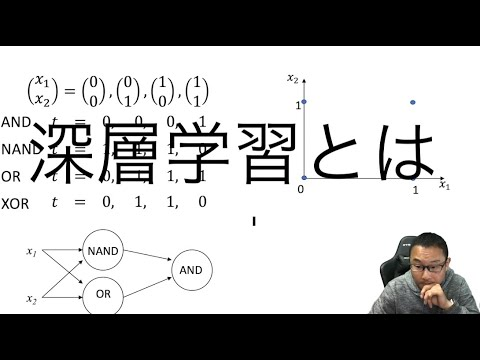

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('1oS6W7N9gHM', width=400, height=225)

In [11]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Step 1: Prepare Data
# XOR gate inputs and labels
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
t = np.array([0, 1, 1, 0], dtype=np.float32)

# Convert to PyTorch tensors
X = torch.tensor(x)
y = torch.tensor(t).unsqueeze(1)  # Reshape labels to match output shape

# Step 2: Define the Neural Network Model
class XORNetwork(nn.Module):
    def __init__(self):
        super(XORNetwork, self).__init__()
        self.hidden = nn.Linear(2, 4)  # 2 inputs -> 4 hidden neurons
        self.output = nn.Linear(4, 1)  # 4 hidden neurons -> 1 output
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

# Instantiate the model
model = XORNetwork()

# Step 3: Define Loss and Optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Step 4: Train the Model
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Step 5: Evaluate the Model
with torch.no_grad():
    predictions = model(X)
    predicted_classes = (predictions > 0.5).float()
    print("\nPredictions:")
    print(predicted_classes.numpy().flatten())
    print("Expected Output:")
    print(t)

Epoch [100/1000], Loss: 0.6303
Epoch [200/1000], Loss: 0.5197
Epoch [300/1000], Loss: 0.3899
Epoch [400/1000], Loss: 0.2674
Epoch [500/1000], Loss: 0.1775
Epoch [600/1000], Loss: 0.1225
Epoch [700/1000], Loss: 0.0895
Epoch [800/1000], Loss: 0.0687
Epoch [900/1000], Loss: 0.0547
Epoch [1000/1000], Loss: 0.0451

Predictions:
[0. 1. 1. 0.]
Expected Output:
[0. 1. 1. 0.]
